# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts  # el alias es cosa mia

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor as RFR

%matplotlib inline


from sklearn.linear_model import LinearRegression as LinReg   # alias es mio

from sklearn.linear_model import Lasso        # regularizacion L1
from sklearn.linear_model import Ridge        # regularizacion L2
from sklearn.linear_model import ElasticNet   # regularizacion L1+L2


# se inician los modelos

linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

## Regression Model Evaluation

In [34]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()



In [35]:
X = pd.DataFrame(housing["data"], columns=housing["feature_names"])
y = pd.DataFrame(housing["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

In [36]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


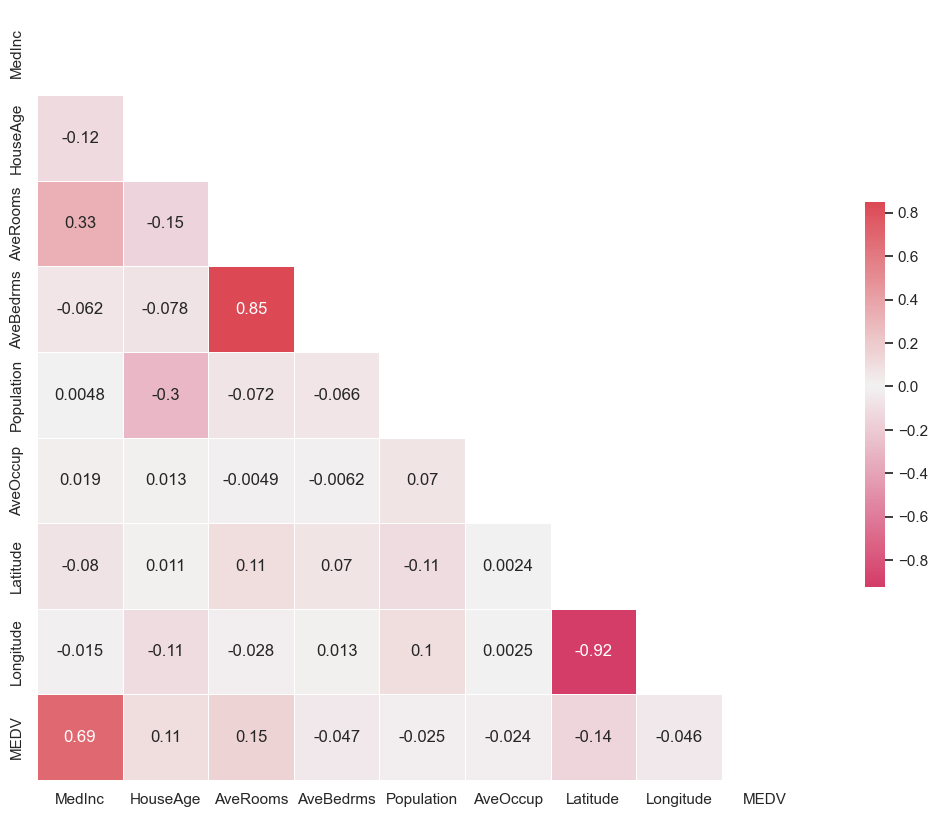

In [37]:
# buscando colinealidad

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

chart gpt me dice que por un tema racial han quitado el dataset de skicit-learn
así que lo hago de california 

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [38]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

Con Random Forest

In [40]:
# modelo

rf = RFR()  # inicia el modelo

rf.fit(X_train, y_train)    # entrena el modelo

y_pred_test = rf.predict(X_test) # prediccion

y_pred_train = rf.predict(X_train)

In [42]:
y_test.shape, y_pred_test.shape

((4128, 1), (4128,))

## 3. Calculate and print R-squared for both the training and the testing set.

Score calcula el coeficiente de determinación r2 del modelo 
<br>
Un valor de 1 es un ajuste ideal

In [43]:


error_test = rf.score(X_test, y_test)
error_train = rf.score(X_train, y_train)

print('Error train: ', error_train)
print('Error test: ', error_test)

Error train:  0.9740741821241732
Error test:  0.808092989612153


Los resultados son buenos y tiene sentido que se acerque más a 1 para el entrenamiento. No parece haber overfitting ya que el test también lo ajusta bien 

## 4. Calculate and print mean squared error for both the training and the testing set.

Que tan cerca están las predicciones del modelo de los valores reales

1. diferencia entre valor real y predicción
2. elevar diferencias al cuadrado (amplificar errores grandes y asegurar siempre positivo)

penaliza errores más grandes 
por eso un valor de mse bajo indica un mejor ajuste del modelo a los datos ya que la media del error es menor

In [44]:
from sklearn.metrics import mean_squared_error as mse  # alias mio


print ('Error cuadratico medio test: ', mse(y_test, y_pred_test))
print ('Error cuadratico medio train: ',mse(y_train, y_pred_train))

Error cuadratico medio test:  0.25147666939960434
Error cuadratico medio train:  0.03465706845922615


## 5. Calculate and print mean absolute error for both the training and the testing set.

A diferencia del anterior el MAE calcula el promedio de las diferencias absolutas sin elevar al cuadrado

No amplifica los errores más grandes, es menos sensible a outliers

In [45]:
from sklearn.metrics import mean_absolute_error as mae  # estos alias tmb son cosa mia

print ('Error absoluto medio test: ', mae(y_test, y_pred_test))
print ('Error absoluto medio train: ', mae(y_train, y_pred_train))

Error absoluto medio test:  0.32478899411337225
Error absoluto medio train:  0.1209439523800876


## Classification Model Evaluation

In [46]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [55]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [52]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [53]:
from sklearn.linear_model import LogisticRegression as LogReg

logreg = LogReg()

logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)  # devuelve la clase, la etiqueta
y_pred_train = logreg.predict(X_train)


## 8. Calculate and print the accuracy score for both the training and the testing set.

Porcentaje de predicicones totales dle modelo

Cuando la distribución no está balanceada hay sesgo

In [54]:
print ('Accuracy test: ',logreg.score(X_test, y_test))
print ('Accuracy train: ',logreg.score(X_train, y_train))

Accuracy test:  1.0
Accuracy train:  0.975


Un 1 es que todas las categorías han sido clasificadas correctamente
<br>
los resultados quieren decir que el modelo es bueno
<br>
demasiado...

<br>

CONCLUSIÓN

Hay underfitting, acierta por chiripa, habría que darle más datos


In [56]:
data['class'].value_counts()

0    50
1    50
2    50
Name: class, dtype: int64

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

Este tiene en cuenta si hay cantidades desiguales de muestras
<br>
como no hay desequilibrio en los datos yo creo que esto no tiene mucho sentido

In [57]:
from sklearn.metrics import balanced_accuracy_score

print ('Balanceado Accuracy tests:',balanced_accuracy_score(y_test, y_pred_test))
print ('Balanceado Accuracy train:',balanced_accuracy_score(y_train, y_pred_train))


Balanceado Accuracy tests: 1.0
Balanceado Accuracy train: 0.975609756097561


## 10. Calculate and print the precision score for both the training and the testing set.

Con qué frecuencia es correcto cuando predice que sí

In [59]:
from sklearn.metrics import precision_score as prec

#el macro es porque la clasificación no es binaria

print ('Precision train:',prec(y_train, y_pred_train, average='macro'))
print ('Precision test:',prec(y_test, y_pred_test, average='macro'))

Precision train: 0.9761904761904763
Precision test: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

Ratio de verdaderos positivos
cuantos valores positivos son correctamente clasificados

In [62]:
from sklearn.metrics import recall_score as rec

print ('Recall test:',rec(y_test, y_pred_test, average='macro'))
print ('Recall train:',rec(y_train, y_pred_train, average='macro'))

Recall test: 1.0
Recall train: 0.975609756097561


## 12. Calculate and print the F1 score for both the training and the testing set.

Media armonica de la precisión y el recall

In [64]:
from sklearn.metrics import f1_score as f1

print ('F1 test:', f1(y_test, y_pred_test, average='macro'))
print ('F1 train:', f1(y_train, y_pred_train, average='macro'))

F1 test: 1.0
F1 train: 0.9749960931395533


## 13. Generate confusion matrices for both the training and the testing set.

In [68]:
from sklearn.metrics import confusion_matrix as cm

matriz_test = cm(y_test, y_pred_test)

matriz_train = cm(y_train, y_pred_train)

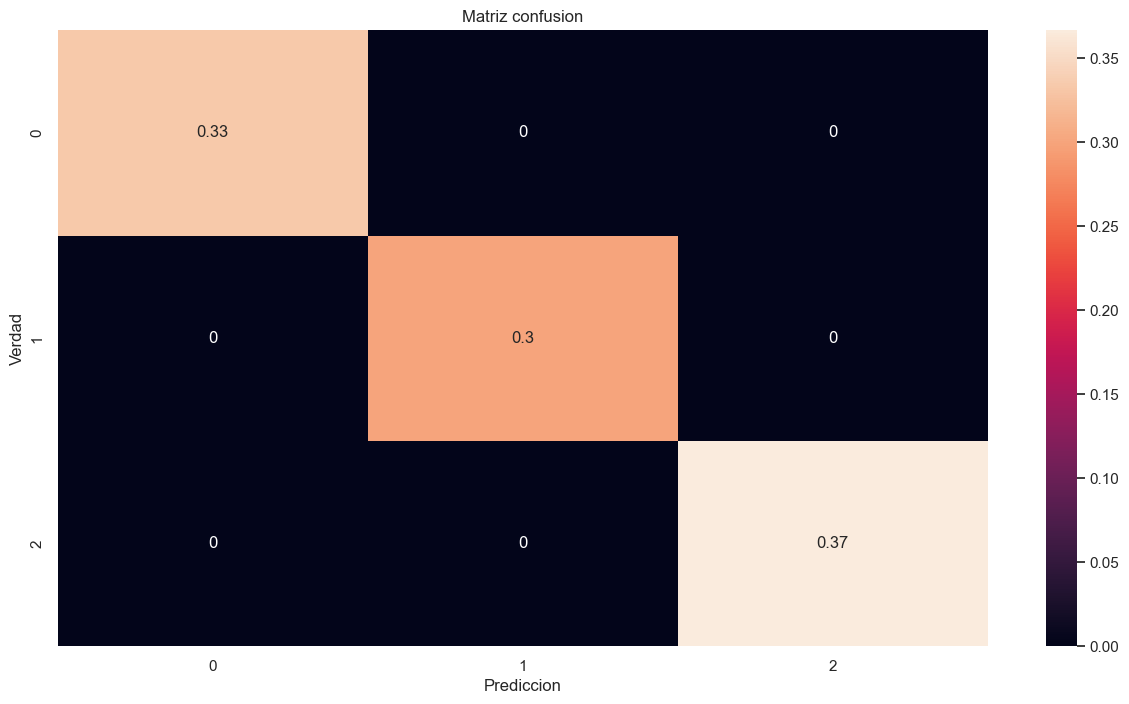

In [70]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(matriz_test/matriz_test.sum(), annot=True)

plt.title('Matriz confusion test')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

Al tener valores solamente en la diagonal quiere decir que acierta siempre tal y como hemos visto en los errores

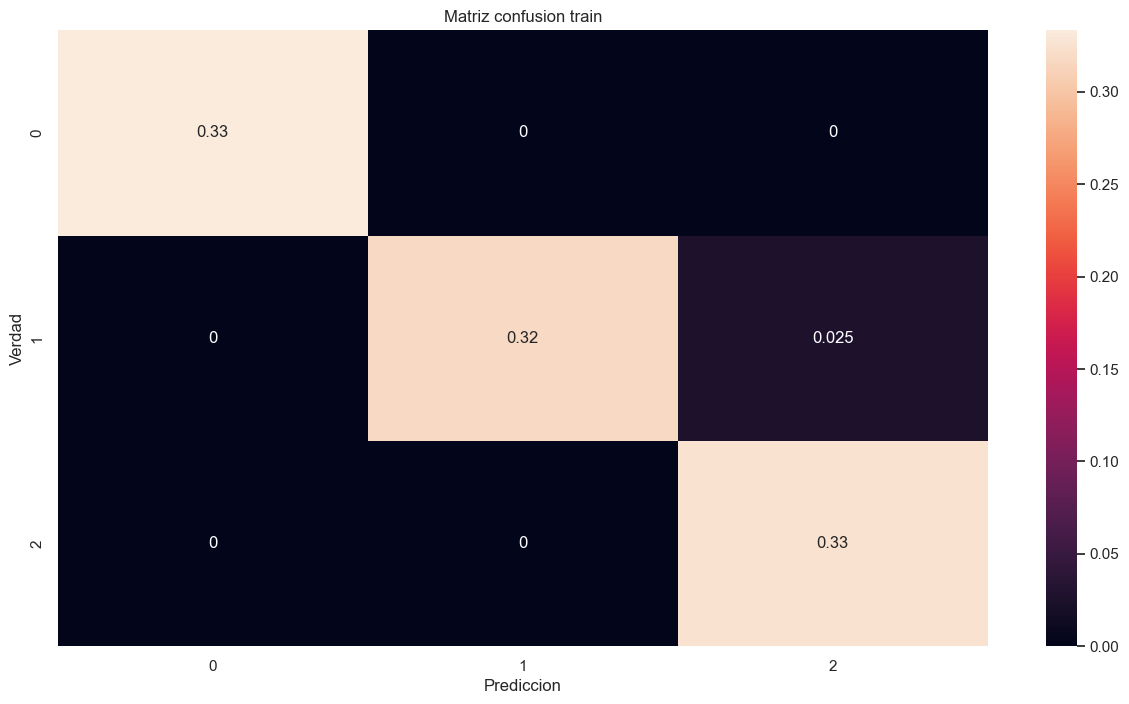

In [71]:
plt.figure(figsize=(15, 8))

ax=sns.heatmap(matriz_train/matriz_train.sum(), annot=True)

plt.title('Matriz confusion train')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.